In [9]:
from numpy import sqrt, sin, cos, tan, radians, pi, sqrt, interp, log10, log, asarray, abs
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
Pe = 30000                      #W
ωp = (1180*2*pi)/60                #rpm  escolhido no motor elétrico (entrada) - rad/s
Ps = 29400                      #W  
ωc = (72*2*pi)/60                  #rpm (saída) -> rad/s
mg1 = (ωp/ωc)

mg2 = sqrt(mg1)
Tent = Ps/ωp  #torque entrada
Tsai = Ps/ωc
print("torque entrada", Tent,"torque saída", Tsai)

torque entrada 237.92315221534184 torque saída 3899.296105751436


In [11]:
Nc = 85 
Np = 21

m = 3  #adotado
pd = 1/m
theta = 20   
a = m                           #adendo
b = 0.25*m                      #dedendo

dpp = m*Np                          #diâmetro primitivo
dep = dpp + a*2                     #diametro externo A = adendo, dp = diam. prim.
drp = dpp - 2*b                     #diametro raiz D = dedendo, dr = diam. raiz
Vp = (pi*ωp/30)*(dpp/2)             #velocidade linear

dpc = m*Nc                          #diâmetro primitivo
dec = dpc + a*2                     #diametro externo A = adendo, dp = diam. prim.
drc = dpc - 2*b                     #diametro raiz D = dedendo, dr = diam. raiz
Vc = (pi*ωc/30)*(dpc/2)             #velocidade linear

Tp1 = Tent                          #torque
Wtp1 = Tp1/(dpp/2)                  #carga transmitida
Wrp1 = Wtp1*tan(radians(theta))
Wp1 = Wtp1/cos(radians(theta))

Tc1 = Tp1*mg2                        #torque
Wtc1 = Tc1/(dpc/2)                   #carga transmitida
Wrc1 = Wtc1*tan(radians(theta))
Wc1 = Wtc1/cos(radians(theta))

Tp2 = Tc1                           #torque
Wtp2 = Tp1/(dpp/2)                  #carga transmitida
Wrp2 = Wtp2*tan(radians(theta))
Wp2 = Wtp2/cos(radians(theta))

Tc2 = Tp1*mg1                        #torque
Wtc2 = Tc2/(dpc/2)                   #carga transmitida
Wrc2 = Wtc2*tan(radians(theta))
Wc2 = Wtc2/cos(radians(theta))

print("Torque de saída =", Tc2)
W=sqrt(Wtc2**2+Wrc2**2)
print("Força da coroa =", W)
R1 = W/2
print("Força do rolamento 1 =", R1)
R2 = W/2
print("Força do rolamento 2 =", R2)

Torque de saída = 3899.296105751436
Força da coroa = 32.54544505131421
Força do rolamento 1 = 16.272722525657105
Força do rolamento 2 = 16.272722525657105


In [12]:
# material e suas propriedades - escolhido aço  SAE 1020
Sut = 420           #Mpa
Sy = 350            #Mpa

Sei = Sut*0.5
print("Sei =", Sei)
Ccarreg = 1             #(Flexão e torção)
Ctamanho = 1            #(como não sabe o tamanho da peça adotado 1,0)
Csuperf = 0.81          #(usinado)
Ctemp = 1               #(Temperatura baixa)
Cconf = 1               #(50%)

Se = Ccarreg*Ctamanho*Csuperf*Ctemp*Cconf*Sei
print("Se =", Se)

Sei = 210.0
Se = 170.10000000000002


In [13]:
# cortante, momento fletor e torque nos pontos críticos

ponto = [0.015, 0.025, 0.058, 0.096, 0.115, 0.125, 0.13]

print("Cortante 1 = 0.015,", "0.025,", "0.058 =", R1)
print("Cortante 2 = 0.096,", "0.115 =", R1 - W)
print("Cortante 3 = 0.125, 0.13 =", R1 - W + R2)

x = 0.015
MB = R1*(x - 0.015)
print("Momento fletor em 0.015 =", MB)
x = 0.025
MC = R1*(x - 0.015)
print("Momento fletor em 0.025 =", MC)
x = 0.058
MD = R1*(x - 0.015)
print("Momento fletor em 0.058 =", MD)
x = 0.096
ME = R1*(x-0.015) - W*(x-0.058)
print("Momento fletor em 0.096 =", ME)
x = 0.115
MF = R1*(x-0.015) - W*(x-0.058)
print("Momento fletor em 0.115 =", MF)
x=0.125
MG = R1*(x-0.015) + R2*(x-0.111) - W*(x-0.058)
print("Momento fletor em 0.125 =", MG)
x=0.135
MH = R1*(x-0.015) + R2*(x-0.111) - W*(x-0.058)
print("Momento fletor em 0.13 =", MH)

Cortante 1 = 0.015, 0.025, 0.058 = 16.272722525657105
Cortante 2 = 0.096, 0.115 = -16.272722525657105
Cortante 3 = 0.125, 0.13 = 0.0
Momento fletor em 0.015 = 0.0
Momento fletor em 0.025 = 0.16272722525657107
Momento fletor em 0.058 = 0.6997270686032556
Momento fletor em 0.096 = 0.08136361262828551
Momento fletor em 0.115 = -0.22781811535919938
Momento fletor em 0.125 = -0.16272722525657102
Momento fletor em 0.13 = -0.16272722525657102


In [14]:
Sut = 60.9         #Mpa > kpsi
Sy = 80.9          #Mpa > kpsi

In [15]:
print("Ponto crítico B, E F e G")

a = 0.10655                          #raiz a
r = 0.04                             # em pol (in)
qt = 1/(1+(a/sqrt(r)))               #sensibilidade ao entalhe flexão
print("qt flexão = ", qt)
kt = 2.3                             #fator de concentrações de tensões teórico estático - flexão
kf = 1+(qt*(kt-1))                   #fator de concentrações de tensões em fagiga dinâmico - flexão
print("kf =", kf)

a = 0.0791                           #raiz a
r = 0.01                             # em pol (in)
qt = 1/(1+(a/sqrt(r)))               #sensibilidade ao entalhe torção
print("qt torção = ", qt)
kts = 2                              #fator de concentrações de tensões teórico estático - torção
kf = 1+(qt*(kts-1))                  #fator de concentrações de tensões em fagiga dinâmico - torção
print("kf =", kf)

#diametro das seções mais solicitadas

kfs = 1 + qt*(kts-1)
kfsm = kfs
Nf = 2.5
Ma = MB
Sf = Se
Tm = 0
print("kfsm", kfsm)
d = (((32*Nf)/pi)*((kfsm*(Ma/Sf))**2+((3/4)*(kfsm*(Tm/Sy)))**2)**(1/2)**(1/3))*25.4
print("diametro do ponto B =", d)

#diametro das seções mais solicitadas

kfs = 1 + qt*(kts-1)
kfsm = kfs
Nf = 2.5
Ma = ME
Sf = Se
Tm = (Tsai/1000)*5.7101
print("kfsm", kfsm)
d = (((32*Nf)/pi)*((kfsm*(Ma/Sf))**2+((3/4)*(kfsm*(Tm/Sy)))**2)**(1/2)**(1/3))*25.4
print("diametro do ponto E =", d)

#diametro das seções mais solicitadas

kfs = 1 + qt*(kts-1)
kfsm = kfs
Nf = 2.5
Ma = MF
Sf = Se
print("kfsm", kfsm)
d = (((32*Nf)/pi)*((kfsm*(Ma/Sf))**2+((3/4)*(kfsm*(Tm/Sy)))**2)**(1/2)**(1/3))*25.4
print("diametro do ponto F =", d)


#diametro das seções mais solicitadas

kfs = 1 + qt*(kts-1)
kfsm = kfs
Nf = 2.5
Ma = MG
Sf = Se
print("kfsm", kfsm)
d = (((32*Nf)/pi)*((kfsm*(Ma/Sf))**2+((3/4)*(kfsm*(Tm/Sy)))**2)**(1/2)**(1/3))*25.4
print("diametro do ponto G =", d)

Ponto crítico B, E F e G
qt flexão =  0.65242211710977
kf = 1.848148752242701
qt torção =  0.5583472920156337
kf = 1.5583472920156338
kfsm 1.5583472920156338
diametro do ponto B = 0.0
kfsm 1.5583472920156338
diametro do ponto E = 106.86436572997451
kfsm 1.5583472920156338
diametro do ponto F = 106.86748108955422
kfsm 1.5583472920156338
diametro do ponto G = 106.8657321186613


In [16]:
print("Ponto crítico D")

a = 0.10655                         #raiz a
r = 0.01                            # em pol (in)
qt = 1/(1+(a/sqrt(r)))              #sensibilidade ao entalhe flexão
print("qt flexão = ", qt)
kt = 2.25                            #fator de concentrações de tensões teórico estático - flexão
kf = 1+(qt*(kt-1))                  #fator de concentrações de tensões em fagiga dinâmico - flexão
print("kf =", kf)

a = 0.0791                         #raiz a
r = 0.01                            # em pol (in)
qt = 1/(1+(a/sqrt(r)))              #sensibilidade ao entalhe torção
print("qt torção = ", qt)
kts = 3                            #fator de concentrações de tensões teórico estático - torção
kfs = 1+(qt*(kts-1))                  #fator de concentrações de tensões em fagiga dinâmico - torção
print("kf =", kf)

#diametro das seções mais solicitadas

kfs = 1 + qt*(kts-1)
kfsm = kfs
Nf = 2.5
Ma = MD
Sf = Se
print("kfsm", kfsm)
d = (((32*Nf)/pi)*((kfsm*(Ma/Sf))**2+((3/4)*(kfsm*(Tm/Sy)))**2)**(1/2)**(1/3))*25.4
print("diametro do ponto D =", d)

Ponto crítico D
qt flexão =  0.4841442749939482
kf = 1.6051803437424352
qt torção =  0.5583472920156337
kf = 1.6051803437424352
kfsm 2.1166945840312676
diametro do ponto D = 173.81316484537484


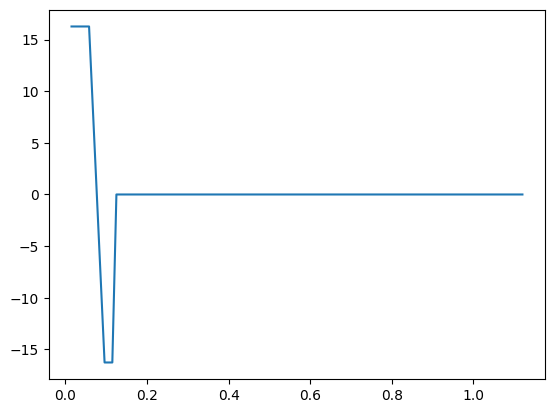

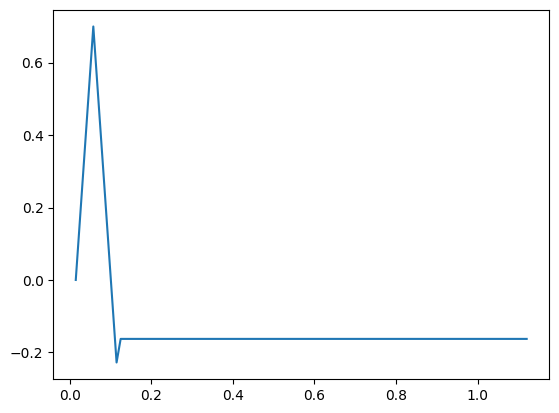

In [17]:
#GRAFICOS

# cortante, momento fletor e torque nos pontos críticos
V1 = R1
V2 = R1 - W
V3 = R1 - W + R2
ponto = [0.015, 0.025, 0.058, 0.096, 0.115, 0.125, 0.13, 1.12]
cortante = [V1, V1, V1, V2, V2, V3, V3, V3]
x=1.12
MI = R1*(x-0.015) + R2*(x-0.111) - W*(x-0.058)
momento = [MB, MC, MD, ME, MF, MG, MH, MI]

plt.plot(ponto,cortante)
plt.show()

plt.plot(ponto,momento)
plt.show()